In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("exercises.csv")
df.head()

,Title,Desc,Type,BodyPart,Equipment,Level,Rating
0,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9
1,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9
2,Dumbbell V-Sit Cross Jab,The dumbbell V-sit cross jab is a hybrid movem...,Strength,Abdominals,Dumbbell,Intermediate,9.3
3,Dumbbell spell caster,The dumbbell spell caster is an exercise that ...,Strength,Abdominals,Dumbbell,Beginner,9.3
4,Landmine twist,The landmine twist is a rotational abdominal m...,Strength,Abdominals,Other,Intermediate,9.5


In [4]:
label_encoders = {}
categorical_cols = ["Type", "BodyPart", "Equipment", "Level"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
from sklearn.cluster import KMeans

C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

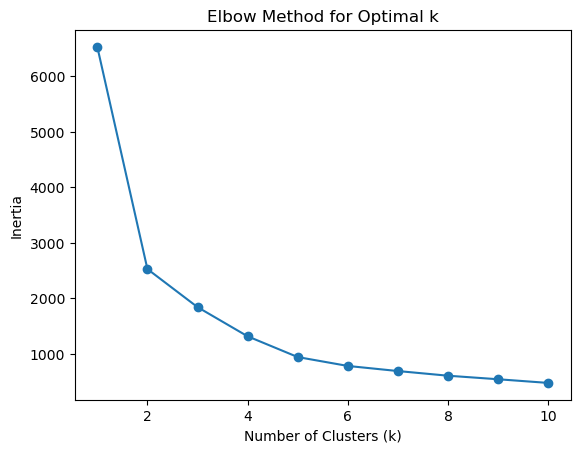

In [6]:
X = df[["Type", "BodyPart", "Equipment", "Level"]]
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [7]:
# Apply K-Means with k=4
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Show some clustered exercises
df[["Title", "Type", "BodyPart", "Equipment", "Level", "Rating", "Cluster"]].head(10)

C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Title,Type,BodyPart,Equipment,Level,Rating,Cluster
0,Barbell roll-out,4,0,1,2,8.9,2
1,Barbell Ab Rollout - On Knees,4,0,1,2,8.9,2
2,Dumbbell V-Sit Cross Jab,4,0,4,2,9.3,2
3,Dumbbell spell caster,4,0,4,0,9.3,2
4,Landmine twist,4,0,10,2,9.5,1
5,Suspended ab fall-out,4,0,10,2,9.3,1
6,Decline reverse crunch,4,0,10,2,9.2,1
7,Weighted Crunches,4,0,10,2,8.9,1
8,Ab Roller,4,0,10,2,8.9,1
9,Otis-Up,4,0,10,2,8.8,1


In [35]:
for col in categorical_cols:
    df[col] = label_encoders[col].inverse_transform(df[col])

In [39]:
df[df["Cluster"] == 0]

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,Cluster
105,Barbell deficit deadlift,The barbell deficit deadlift is a compound exe...,Powerlifting,Lower Back,Barbell,Beginner,9.4,0
106,Back extension,The back extension is an exercise used to buil...,Strength,Lower Back,Body Only,Intermediate,9.1,0
107,Reverse-grip bent-over row,The reverse-grip bent-over row is a compound e...,Strength,Middle Back,Barbell,Intermediate,9.2,0
108,One-Arm Long Bar Row,The single-arm landmine bent-over row is a bar...,Strength,Middle Back,Barbell,Intermediate,9.0,0
109,Bent Over Barbell Row,The barbell bent-over row is a compound exerci...,Strength,Middle Back,Barbell,Intermediate,8.7,0
...,...,...,...,...,...,...,...,...
202,Parallel Bar Dip,The triceps dip is a bodyweight exercise perfo...,Strength,Triceps,Body Only,Intermediate,8.8,0
203,Ring dip,The ring dip is an upper-body strength exercis...,Strength,Triceps,Body Only,Intermediate,8.8,0
204,Feet-elevated bench dip,The feet-elevated bench dip is a popular bodyw...,Strength,Triceps,Body Only,Intermediate,8.7,0
205,Decline EZ-bar skullcrusher,The decline EZ-bar skullcrusher is a popular e...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.3,0
